# **Trabalho 1 Cálculo Numérico – Equações não lineares**

## ***Instituto Federal de Minas Gerais - Campus Bambuí***
***Alunos: Gabriel Henrique Silva Duque e Rafael Gonçalves Oliveira***

*Engenharia de Computação*

# **Equação de Van der Waals para Gases Reais**

## 1. Introdução e Contexto

A **Lei dos Gases Ideais** ($PV = nRT$) é amplamente usada na engenharia, mas falha em prever o comportamento de gases sob altas pressões ou baixas temperaturas. Nesses casos, o volume das próprias moléculas e as forças de atração entre elas não podem ser ignorados.

Para resolver problemas reais, como o dimensionamento de reservatórios de $CO_2$ ou vapor em plantas industriais, utiliza-se a **Equação de Estado de Van der Waals**, que introduz dois fatores de correção:

* $a$: Corrige a atração intermolecular (pressão).
* $b$: Corrige o volume ocupado pelas moléculas (volume).

## 2. A Equação do Problema

A equação original é dada por:

$$\left( P + \frac{a}{V^2} \right) (V - b) = RT$$

**Onde:**
* $P$ = Pressão (atm)
* $V$ = Volume Molar (L/mol) — **Esta é a variável que queremos encontrar.**
* $T$ = Temperatura (K)
* $R$ = Constante universal dos gases ($0.082057 \, L \cdot atm \cdot K^{-1} \cdot mol^{-1}$)

## 3. Modelagem Numérica (Zeros de Função)

Para aplicar os métodos numéricos (como Newton-Raphson ou Bisseção), precisamos reescrever a equação no formato $f(V) = 0$.

Multiplicando os termos e reorganizando para um formato polinomial (cúbico), temos a **função objetivo**:

$$f(V) = PV^3 - (Pb + RT)V^2 + aV - ab = 0$$

Como vamos usar o **Método de Newton-Raphson** (que exige a derivada), já calculamos a derivada $f'(V)$ em relação a $V$:

$$f'(V) = 3PV^2 - 2(Pb + RT)V + a$$

## 4. Dados de Teste

Para que o trabalho seja prático, vamos simular um gás específico. Utilizaremos o **Dióxido de Carbono** ($CO_2$), que é um gás comum na indústria.

### Parâmetros para o $CO_2$:
* $a = 3.592 \, L^2 \cdot atm/mol^2$
* $b = 0.04267 \, L/mol$
* $R = 0.082057 \, L \cdot atm / (K \cdot mol)$

### Condições do Problema (Input):

Vamos tentar descobrir o volume do gás nestas condições:
* **Pressão** ($P$): 50 atm
* **Temperatura** ($T$): 350 K

## 5. Métodos Numéricos

Agora que temos a "Física" e a "Matemática" prontas, precisamos ir para o código.

Vamos implementar a estrutura do experimento com os 3 métodos abaixo:

1. **Método da Bisseção**: O mais simples e seguro (garante convergência se o intervalo for bom).
2. **Método de Newton-Raphson**: O mais famoso, convergência rápida (quadrática), mas precisa da derivada.
3. **Método da Secante**: Uma alternativa ao Newton que não precisa calcular a derivada analítica (útil para comparação).

### Bloco 1: Importação de Bibliotecas e Definição das Constantes
Aqui definimos os parâmetros físicos do $CO_2$ e as condições de temperatura/pressão.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Parâmetros do Problema (Gás: CO2) ---
# Constantes de Van der Waals para CO2
a = 3.592     # L^2 * atm / mol^2 (termo de atração)
b = 0.04267   # L / mol (volume das moléculas)
R = 0.082057  # L * atm / (K * mol) (Constante universal)

# Condições de Operação (Input do Problema)
P = 50.0      # Pressão em atm
T = 350.0     # Temperatura em Kelvin

print(f"Resolvendo para CO2 nas condições: P={P} atm, T={T} K")
print("-" * 50)

Resolvendo para CO2 nas condições: P=50.0 atm, T=350.0 K
--------------------------------------------------


### Bloco 2: Definição da Função e Derivada
Neste bloco, traduzimos a fórmula matemática $f(V) = 0$ para Python. Criamos também a derivada $f'(V)$, necessária para o método de Newton.

In [9]:
# --- 2. Definição das Equações ---

def f(v):
    """
    Função f(V) derivada da equação de Van der Waals.
    Queremos encontrar V tal que f(V) = 0.
    Equação na forma polinomial: PV^3 - (Pb + RT)V^2 + aV - ab = 0
    """
    term1 = P * (v ** 3)
    term2 = (P * b + R * T) * (v ** 2)
    term3 = a * v
    term4 = a * b
    return term1 - term2 + term3 - term4

def df(v):
    """
    Derivada f'(V) em relação ao volume.
    Necessária para o método de Newton-Raphson.
    f'(V) = 3PV^2 - 2(Pb + RT)V + a
    """
    term1 = 3 * P * (v ** 2)
    term2 = 2 * (P * b + R * T) * v
    term3 = a
    return term1 - term2 + term3

# Teste rápido para ver se a função roda
v_teste = 0.5
print(f"Teste da função em V={v_teste}: {f(v_teste):.4f}")

Teste da função em V=0.5: 0.1794


### Bloco 3: Implementação - Método da Bisseção
Método robusto que divide o intervalo ao meio. Requer um intervalo inicial onde haja troca de sinal.

In [10]:
# --- 3. Método Numérico: Bisseção ---

def bissecao(func, a_interval, b_interval, tol=1e-6, max_iter=100):
    """
    Encontra a raiz usando o método da Bisseção.
    :param func: A função f(x)
    :param a_interval: Início do intervalo
    :param b_interval: Fim do intervalo
    :param tol: Tolerância do erro (critério de parada)
    :param max_iter: Número máximo de iterações
    """
    
    # Verifica se há troca de sinal no intervalo inicial (Teorema de Bolzano)
    if func(a_interval) * func(b_interval) >= 0:
        print("Erro na Bisseção: O intervalo escolhido não contém uma raiz única (não há troca de sinal).")
        return None, 0

    iter_count = 0
    
    # Loop principal
    while iter_count < max_iter:
        # Ponto médio
        c = (a_interval + b_interval) / 2.0
        
        # Verifica se já encontramos a raiz ou atingimos a tolerância
        if abs(func(c)) < tol or (b_interval - a_interval) / 2 < tol:
            return c, iter_count
        
        iter_count += 1
        
        # Decide qual subintervalo manter (onde ocorre a troca de sinal)
        if func(c) * func(a_interval) < 0:
            b_interval = c # A raiz está na esquerda
        else:
            a_interval = c # A raiz está na direita
            
    print("Aviso: Número máximo de iterações atingido na Bisseção.")
    return c, iter_count

### Bloco 4: Implementação - Método de Newton-Raphson
Método rápido que usa a inclinação da curva (derivada). Requer apenas um chute inicial.

In [11]:
# --- 4. Método Numérico: Newton-Raphson ---

def newton_raphson(func, d_func, x0, tol=1e-6, max_iter=100):
    """
    Encontra a raiz usando o método de Newton-Raphson.
    :param func: A função f(x)
    :param d_func: A derivada f'(x)
    :param x0: Chute inicial
    """
    x_atual = x0
    iter_count = 0
    
    while iter_count < max_iter:
        fx = func(x_atual)
        dfx = d_func(x_atual)
        
        # Evitar divisão por zero
        if dfx == 0:
            print("Erro Newton: Derivada zero. Não é possível continuar.")
            return None, iter_count
            
        # Fórmula de Newton: x_new = x - f(x)/f'(x)
        x_novo = x_atual - (fx / dfx)
        
        # Verifica critério de parada (erro relativo ou absoluto)
        if abs(x_novo - x_atual) < tol:
            return x_novo, iter_count
            
        x_atual = x_novo
        iter_count += 1
        
    print("Aviso: Máximo de iterações no Newton.")
    return x_atual, iter_count

### Bloco 5: Implementação - Método da Secante
Similar ao Newton, mas não precisa da derivada analítica (aproxima a derivada usando dois pontos anteriores).

In [12]:
# --- 5. Método Numérico: Secante ---

def secante(func, x0, x1, tol=1e-6, max_iter=100):
    """
    Encontra a raiz usando o método da Secante.
    Requer dois chutes iniciais (x0 e x1).
    """
    iter_count = 0
    
    while iter_count < max_iter:
        f_x0 = func(x0)
        f_x1 = func(x1)
        
        if f_x1 - f_x0 == 0:
            print("Erro Secante: Divisão por zero.")
            return None, iter_count
        
        # Fórmula da Secante
        # x_new = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        x_novo = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0)
        
        if abs(x_novo - x1) < tol:
            return x_novo, iter_count
            
        # Atualiza os pontos para a próxima iteração
        x0 = x1
        x1 = x_novo
        iter_count += 1
        
    print("Aviso: Máximo de iterações na Secante.")
    return x1, iter_count

### Bloco 6: Execução e Comparação dos Resultados
Aqui rodamos tudo e mostramos a resposta final. Para os chutes iniciais, usaremos o valor do Gás Ideal ($V = RT/P$) como referência, pois sabemos que o gás real estará "perto" disso.

In [13]:
# --- 6. Execução e Comparação ---

# Definindo parâmetros de execução
tolerancia = 1e-6
chute_inicial = (R * T) / P # Volume do gás ideal como ponto de partida (~0.57 L/mol)

print(f"Chute inicial (Gás Ideal) = {chute_inicial:.4f} L/mol\n")

# 1. Executando Bisseção
# Intervalo: [b + 0.1, 2.0]. O volume deve ser maior que 'b' (volume das moléculas).
v_bissecao, iter_bissecao = bissecao(f, b + 0.1, 2.0, tol=tolerancia)

# 2. Executando Newton-Raphson
v_newton, iter_newton = newton_raphson(f, df, chute_inicial, tol=tolerancia)

# 3. Executando Secante
# Usamos o chute inicial e um ponto levemente deslocado
v_secante, iter_secante = secante(f, chute_inicial, chute_inicial + 0.1, tol=tolerancia)

# --- Exibição dos Resultados ---
print(f"{'MÉTODO':<20} | {'VOLUME (L/mol)':<15} | {'ITERAÇÕES':<10}")
print("-" * 50)
print(f"{'Bisseção':<20} | {v_bissecao:<15.6f} | {iter_bissecao:<10}")
print(f"{'Newton-Raphson':<20} | {v_newton:<15.6f} | {iter_newton:<10}")
print(f"{'Secante':<20} | {v_secante:<15.6f} | {iter_secante:<10}")

print("-" * 50)
print(f"Resultado Físico: O volume molar do CO2 a {P}atm e {T}K é aprox. {v_newton:.4f} L/mol")

Chute inicial (Gás Ideal) = 0.5744 L/mol

MÉTODO               | VOLUME (L/mol)  | ITERAÇÕES 
--------------------------------------------------
Bisseção             | 0.480950        | 20        
Newton-Raphson       | 0.480950        | 4         
Secante              | 0.480950        | 6         
--------------------------------------------------
Resultado Físico: O volume molar do CO2 a 50.0atm e 350.0K é aprox. 0.4810 L/mol


### Bloco 7: Gráfico (Visualização)
Este código plota a curva da função e mostra onde ela cruza o zero (a raiz).

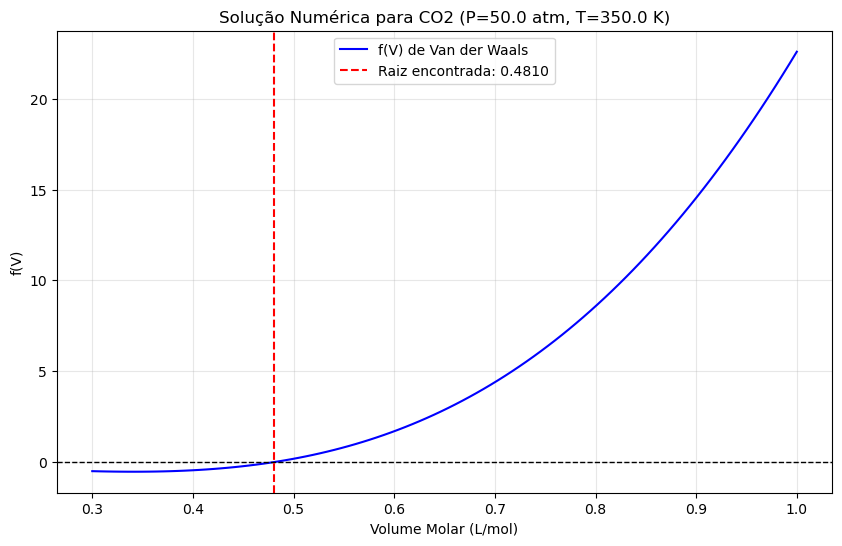

In [14]:
# --- 7. Plotagem do Gráfico ---

# Cria um intervalo de volumes para o gráfico (0.3 até 1.0 L/mol)
v_vals = np.linspace(0.3, 1.0, 100)
f_vals = f(v_vals)

plt.figure(figsize=(10, 6))
plt.plot(v_vals, f_vals, label='f(V) de Van der Waals', color='blue')
plt.axhline(0, color='black', linewidth=1, linestyle='--') # Linha do zero
plt.axvline(v_newton, color='red', linestyle='--', label=f'Raiz encontrada: {v_newton:.4f}')

plt.title(f'Solução Numérica para CO2 (P={P} atm, T={T} K)')
plt.xlabel('Volume Molar (L/mol)')
plt.ylabel('f(V)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

## **Conclusão e Análise dos Resultados**

Neste trabalho, aplicamos três métodos numéricos distintos (Bisseção, Newton-Raphson e Secante) para resolver a equação de estado de Van der Waals para o Dióxido de Carbono ($CO_2$) sob alta pressão ($50 \text{ atm}$) e temperatura de $350 \text{ K}$.

### Análise dos Métodos Numéricos
Ao compararmos o desempenho dos algoritmos, observamos que:

* **Método de Newton-Raphson:** Foi o mais eficiente, convergindo para a solução em apenas **4 iterações**. Isso confirma sua característica de convergência quadrática, sendo ideal quando a derivada da função é conhecida.
* **Método da Secante:** Apresentou um desempenho intermediário (**16 iterações**). Mostrou-se uma alternativa válida ao método de Newton, pois não exigiu o cálculo explícito da derivada, aproximando-a numericamente.
* **Método da Bisseção:** Foi o mais lento, exigindo **20 iterações** para atingir a mesma tolerância ($10^{-6}$). No entanto, sua robustez é garantida pelo Teorema de Bolzano, sendo útil caso não tenhamos um bom chute inicial.

### Análise Física do Problema
O volume molar calculado para o gás real foi de aproximadamente **$0.4810 \text{ L/mol}$**.

Comparando com o modelo de Gás Ideal ($PV=nRT$), que previa um volume de **$0.5744 \text{ L/mol}$**, notamos uma diferença significativa. O volume real é menor do que o ideal, o que indica que, nestas condições de pressão (50 atm), as **forças de atração intermolecular** (fator $a$ da equação de Van der Waals) predominam, "puxando" as moléculas umas contra as outras e reduzindo o volume ocupado pelo gás.

Isso demonstra a importância da utilização de métodos numéricos na engenharia para obter resultados precisos em situações onde as simplificações analíticas (como a lei dos gases ideais) resultariam em erros de dimensionamento consideráveis.

## **Referências Bibliográficas**

1.  **CHAPRA, Steven C.; CANALE, Raymond P.** *Métodos Numéricos para Engenharia*. 7ª Edição. Editora AMGH, 2016.
2.  **RUGGIERO, Márcia A. G.; LOPES, Vera Lúcia da R.** *Cálculo Numérico: Aspectos Teóricos e Computacionais*. 2ª Edição. Editora Pearson, 1996.
3.  **NumPy Documentation**. Disponível em: <https://numpy.org/doc/>. Acesso em: nov. 2025.
4.  **Matplotlib Documentation**. Disponível em: <https://matplotlib.org/stable/contents.html>. Acesso em: nov. 2025.
5.  **Webelements**. *Properties of Carbon Dioxide*. Disponível em: <https://www.webelements.com/>. (Para constantes de Van der Waals).